# Business Case: Walmart - Confidence Interval and CLT

# 1. Introduction

# What is Walmart?




Walmart, founded in 1962 by Sam Walton, is a global retail powerhouse and one of the most influential companies worldwide. Headquartered in Bentonville, Arkansas, this American multinational corporation has established itself as a dominant force in the retail industry. Walmart operates an extensive network of hypermarkets, discount department stores, and grocery outlets under various brand names, both across the United States and internationally.

Renowned for its "Everyday Low Prices" philosophy, Walmart has revolutionized the retail landscape by consistently offering a vast selection of products at competitive prices. Its highly efficient supply chain and distribution systems have reshaped consumer expectations, setting new standards for affordability and accessibility. In addition to its substantial retail presence, Walmart has expanded into e-commerce, technological innovation, and sustainability initiatives, solidifying its role as a key player in the evolving global marketplace.


## 🎯 Objective

The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.

## 📚 About Data

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. It contains information on about 0.5 million transactions during Black Friday throughout various years.

## 📃 Features of the dataset:

| Feature | Description |
|:--------|:------------|
| User_ID | User ID of the Customer |
| Product ID | Product ID of the Purchased Product |
| Gender | Gender of the Customer (Male/Female) |
| Age | Age of the Customer (in bins) |
| Occupation | Occupation of the Customer (Masked) |
| City_Category | Category of the City (A, B, C) |
| StayInCurrentCityYears | Number of years stay in current city |
| Marital_Status | Marital Status (0 - Unmarried / 1 - Married) |
| ProductCategory | Product Category (Masked) |
| Purchase | Purchase Amount |


# 2. Exploratory Data Insights: From Raw Data to Actionable Intelligence

In [7]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [9]:
# loading the dataset
df = pd.read_csv('/content/sample_data/walmart_data.csv')

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [11]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [12]:
df.shape

(550068, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### 🔍 Insights

- Based on the analysis, the dataset comprises 10 features, containing a mix of both alphanumeric and categorical data.


- Except for the Purchase column, all other features are of categorical nature. To optimize memory usage and enhance processing efficiency, we will convert these columns to the appropriate category data type.

## 🔁 Changing the Datatype of Columns


In [14]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


## 📝 Statistical Summary

### Satistical summary of object type columns

In [ ]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


### 🔍 Insights

Based on the analysis, the dataset consists of 5,891 unique customers and 3,631 unique products. The top-selling product, P00265242, sold 1,880 units. Male customers accounted for 75% of transactions, and the 26-35 age group was the most active, contributing 40% of total purchases. Customers from Category B cities and those with 1 year of residency in their current city made the highest number of purchases. Unmarried customers were responsible for 59% of transactions, and Product Category 5 was the most popular, with 150,933 units sold. These insights highlight key demographics, popular products, and high-activity regions, which can guide targeted marketing and inventory strategies.

### Satistical summary of  numerical data type columns

In [15]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


### 🔍 Insights

`The purchase amounts` vary widely, with the minimum recorded purchase being `$12` and the maximum reaching `$23961`. The `median` purchase amount of `$8047` is notably lower than the `mean` purchase amount of `$9264`, indicating a `right-skewed distribution` where a few high-value purchases pull up the mean

## 👥 Duplicate Detection

In [ ]:
df.duplicated().value_counts()

False    550068
dtype: int64

### 🔍 Insights

- There are no duplicate entries in the dataset

## ✅ Sanity Check for columns

In [17]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in User_ID column are :-
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
----------------------------------------------------------------------
Unique Values in Product_ID column are :-
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
----------------------------------------------------------------------
Unique Values in Gender column are :-
['F', 'M']
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------
Unique Values in Age column are :-
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Cat

### 🔍 Insights

- The dataset does not contain any abnormal values.


- We will convert the 0,1 in Marital Status column as married and unmarried

In [18]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

## 👨🏽‍💻 Missing Value Analysis

In [19]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


### 🔍 Insights

- The dataset does not contain any missing values.

# 3.Univariate Analysis

## 3.1 Numerical Variables

### 💰 3.1.1 Purchase Amount Distribution

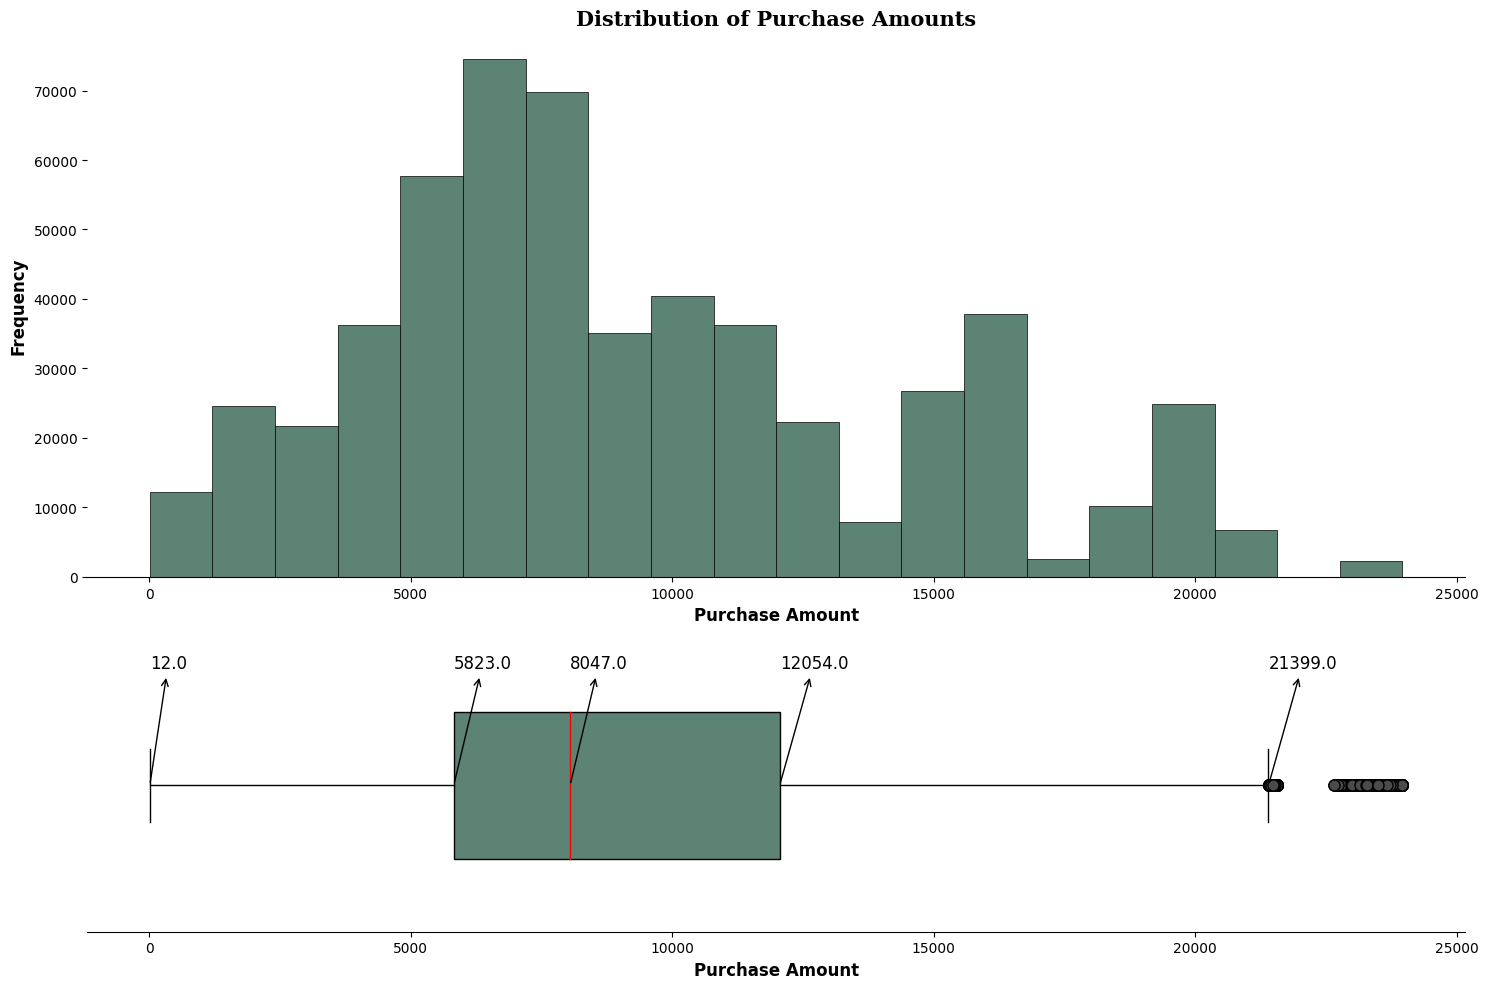

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Setting up plot style and size
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[0.65, 0.35])

### Purchase Amount Histogram ###

# Creating the histogram for Purchase Amount
ax0 = fig.add_subplot(gs[0, 0])
ax0.hist(df['Purchase'], color='#5C8374', linewidth=0.5, edgecolor='black', bins=20)

# Setting x and y labels
ax0.set_xlabel('Purchase Amount', fontsize=12, fontweight='bold')
ax0.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Removing unnecessary axis lines for a cleaner look
for spine in ['top', 'left', 'right']:
    ax0.spines[spine].set_visible(False)

# Adding a title to the histogram
ax0.set_title('Distribution of Purchase Amounts', fontdict={'font': 'serif', 'size': 15, 'weight': 'bold'})

### Purchase Amount Boxplot ###

# Creating the boxplot for Purchase Amount
ax1 = fig.add_subplot(gs[1, 0])
boxplot = ax1.boxplot(df['Purchase'], vert=False, patch_artist=True, widths=0.5)

# Customizing box colors
boxplot['boxes'][0].set(facecolor='#5C8374')

# Customizing median line color
boxplot['medians'][0].set(color='red')

# Customizing outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor="#4b4b4c")

# Removing axis lines for a cleaner look
for spine in ['top', 'left', 'right']:
    ax1.spines[spine].set_visible(False)

# Adding 5-point summary annotations (whiskers: min, Q1, Q3, max, and median)
info = [whisker.get_xdata() for whisker in boxplot['whiskers']]  # Fetching the whisker data (Q1, Q3, min, max)
median = df['Purchase'].median()  # Fetching the median (Q2)

# Annotating the whisker points
for lower, upper in info:
    ax1.annotate(f"{lower:.1f}", xy=(lower, 1), xytext=(lower, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
    ax1.annotate(f"{upper:.1f}", xy=(upper, 1), xytext=(upper, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

# Annotating the median
ax1.annotate(f"{median:.1f}", xy=(median, 1), xytext=(median + 1, 1.4), fontsize=12,
             arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

# Removing y-axis ticks (not useful for boxplots)
ax1.set_yticks([])

# Setting x-axis label
ax1.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)

# Display the final plot
plt.tight_layout()  # Adjust the layout to prevent overlapping of subplots
plt.show()


#Insights:

*    **Customer Behavior:** Most customers are making purchases in the 5,000-12,000 range, but there are several instances of high-spending customers that push the distribution to the right.


*   **Outliers:** The presence of outliers suggests there may be specific customers or events (e.g., bulk purchases, special discounts) driving these high purchase amounts.

*   P**ricing and Marketing Strategy:** If these insights are linked to a promotion or sales event (like Black Friday), Walmart could focus its strategies to target the majority of customers who make mid-range purchases, while also understanding the behavior of high-spending customers.

#### Calculating the Number of Outliers

- As seen above, Purchase amount over 21399 is considered as outlier. We will count the number of outliers as below

In [22]:
len(df.loc[df['Purchase'] > 21399,'Purchase'])

2677

### 🔍 Insights

- **Outliers**
    
    - A total of 2,677 outliers were identified, representing approximately 0.48% of the overall dataset for purchase amounts. These outliers reflect a wide range of spending behaviors during the sale, from average to exceptionally high-value purchases. Rather than removing them, we acknowledge their strategic importance. They underscore the need for differentiated marketing approaches to effectively engage both regular shoppers and high-spending customers, maximizing overall revenue potential.


- **Distribution**

    - The data indicates that the majority of customers made purchases ranging between 5,823 USD and 12,054 USD, with the median purchase amount standing at 8,047 USD. This range suggests that most customers fall into a moderate spending category during the sale period.
    
    - The minimum purchase amount of 12 USD and the maximum purchase amount of 21,399 USD reveal a high degree of variability in spending patterns. This diversity highlights the broad customer base, from low to high spenders, which could be leveraged for targeted promotional strategies.
    
   

## 3.2 Categorical Variables

###  3.2.1 🙎🏻‍♀️🙎🏻‍♂️ Gender, 👩🏻‍🤝‍🧑🏻Marital Status  and 🌍City Category Distribution

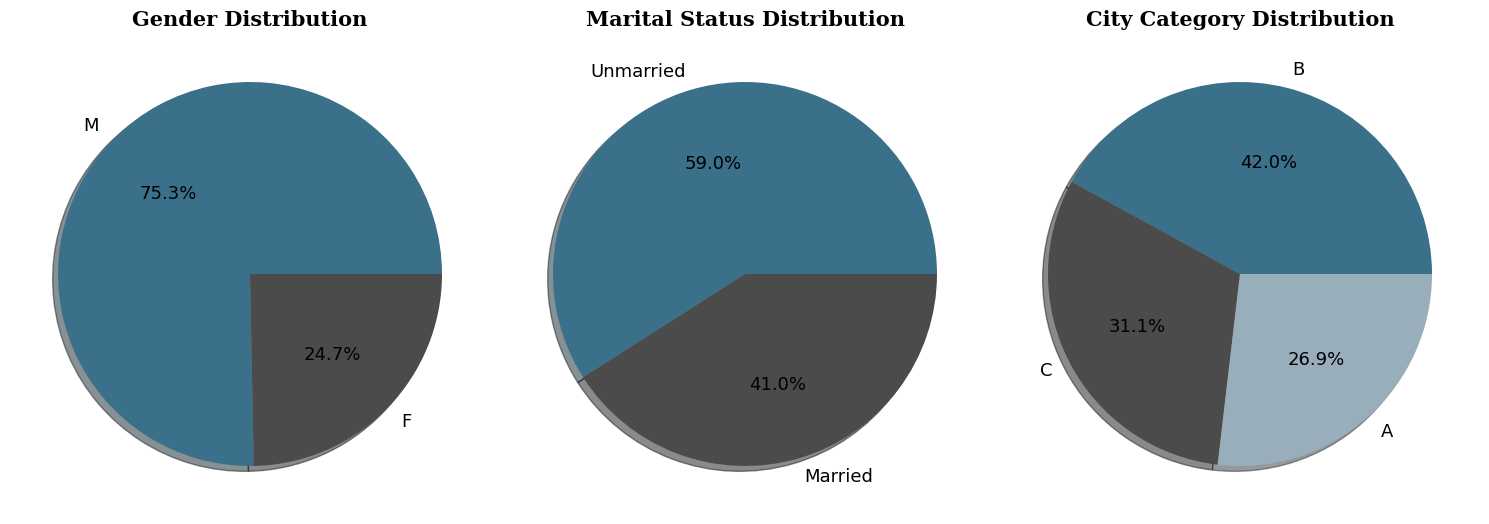

In [23]:
# Setting the plot style and figure size
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(1, 3)

# --------- Pie Chart for Gender Distribution ---------
ax0 = fig.add_subplot(gs[0, 0])
gender_colors = ["#3A7089", "#4b4b4c"]  # Custom color palette for gender distribution
ax0.pie(df['Gender'].value_counts().values,
        labels=df['Gender'].value_counts().index,
        autopct='%.1f%%',
        shadow=True,
        colors=gender_colors,
        textprops={'fontsize': 13, 'color': 'black'})

# Set title for Gender Distribution chart
ax0.set_title('Gender Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

# --------- Pie Chart for Marital Status Distribution ---------
ax1 = fig.add_subplot(gs[0, 1])
marital_colors = ["#3A7089", "#4b4b4c"]  # Custom color palette for marital status
ax1.pie(df['Marital_Status'].value_counts().values,
        labels=df['Marital_Status'].value_counts().index,
        autopct='%.1f%%',
        shadow=True,
        colors=marital_colors,
        textprops={'fontsize': 13, 'color': 'black'})

# Set title for Marital Status Distribution chart
ax1.set_title('Marital Status Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

# --------- Pie Chart for City Category Distribution ---------
ax2 = fig.add_subplot(gs[0, 2])
city_colors = ["#3A7089", "#4b4b4c", '#99AEBB']  # Custom color palette for city categories
ax2.pie(df['City_Category'].value_counts().values,
        labels=df['City_Category'].value_counts().index,
        autopct='%.1f%%',
        shadow=True,
        colors=city_colors,
        textprops={'fontsize': 13, 'color': 'black'})

# Set title for City Category Distribution chart
ax2.set_title('City Category Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

# Show the plot
plt.tight_layout()
plt.show()


### 🔍 Insights

1. Gender Distribution:
The data reveals a notable difference in purchasing behavior between male and female customers during the Black Friday event, highlighting potential opportunities for gender-targeted marketing strategies.

2. Marital Status:
Unmarried customers represent a larger share of transactions, suggesting a potential for tailored marketing campaigns or promotions designed to appeal specifically to this demographic.

3. City Category:
City B recorded the highest number of transactions, followed by City C and City A. This trend could inform location-based strategies, allowing for more focused marketing efforts in high-activity areas.



### 3.2.2 📆 Customer Age Distribution

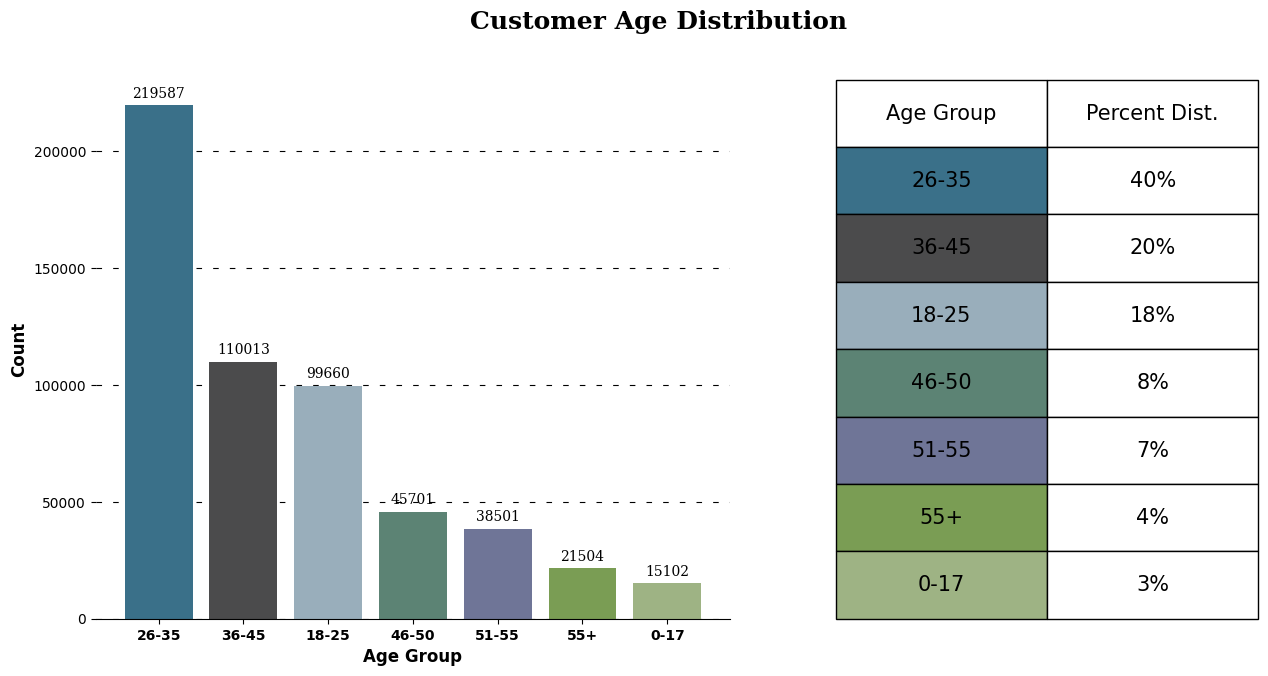

In [24]:
import matplotlib.pyplot as plt

# Setting up the figure and grid layout
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(1, 2, width_ratios=[0.6, 0.4])

# ------------------------------------------------------------
# Bar Chart: Age Group Distribution
# ------------------------------------------------------------
ax0 = fig.add_subplot(gs[0, 0])
age_counts = df['Age'].value_counts()  # Getting value counts for age groups
color_map = ["#3A7089", "#4b4b4c", "#99AEBB", "#5C8374", "#6F7597", "#7A9D54", "#9EB384"]

# Plotting the bar chart
ax0.bar(x=age_counts.index, height=age_counts.values, color=color_map, zorder=2)

# Adding value labels to the bars
for age_group in age_counts.index:
    ax0.text(age_group, age_counts[age_group] + 5000, age_counts[age_group],
             fontdict={'family': 'serif', 'size': 10}, ha='center', va='center')

# Customizing the grid and appearance
ax0.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))
ax0.spines[['top', 'left', 'right']].set_visible(False)  # Removing unnecessary spines

# Setting axis labels and customizing tick labels
ax0.set_ylabel('Count', fontweight='bold', fontsize=12)
ax0.set_xlabel('Age Group', fontweight='bold', fontsize=12)
ax0.set_xticklabels(age_counts.index, fontweight='bold')

# ------------------------------------------------------------
# Information Table: Age Group Percentage Distribution
# ------------------------------------------------------------
ax1 = fig.add_subplot(gs[0, 1])

# Data for the table (age group, percentage distribution)
age_info = [
    ['26-35', '40%'], ['36-45', '20%'], ['18-25', '18%'],
    ['46-50', '8%'], ['51-55', '7%'], ['55+', '4%'], ['0-17', '3%']
]
color_2d = [
    ["#3A7089", '#FFFFFF'], ["#4b4b4c", '#FFFFFF'], ['#99AEBB', '#FFFFFF'],
    ['#5C8374', '#FFFFFF'], ['#6F7597', '#FFFFFF'], ['#7A9D54', '#FFFFFF'],
    ['#9EB384', '#FFFFFF']
]

# Creating the table with custom colors and layout
table = ax1.table(cellText=age_info, cellColours=color_2d, cellLoc='center',
                  colLabels=['Age Group', 'Percent Dist.'], colLoc='center',
                  bbox=[0, 0, 1, 1])

# Setting the font size for the table
table.set_fontsize(15)

# Removing axis for the table plot
ax1.axis('off')

# ------------------------------------------------------------
# Final Visual Customization
# ------------------------------------------------------------
fig.suptitle('Customer Age Distribution', font='serif', size=18, weight='bold')

# Display the plot
plt.show()


### 🔍 Insights



*   The age group 26-35 constitutes the largest portion of Walmart's Black Friday sales, representing 40% of the total sales. This indicates that young and middle-aged adults are the most active and engaged demographic when it comes to shopping for deals and discounts.
*   The 36-45 and 18-25 age groups follow as the second and third largest segments, contributing 20% and 18% of the sales, respectively. This highlights Walmart's ability to attract a diverse customer base, spanning different life stages and shopping preferences.


* The 46-50, 51-55, 55+, and 0-17 age groups make up the smallest customer segments, each accounting for less than 10% of total sales. This suggests potential opportunities for Walmart to refine its marketing strategies and tailor product offerings to better engage these underrepresented groups, particularly seniors and families with children.









### 3.2.3 🌆 Customer Stay In current City Distribution

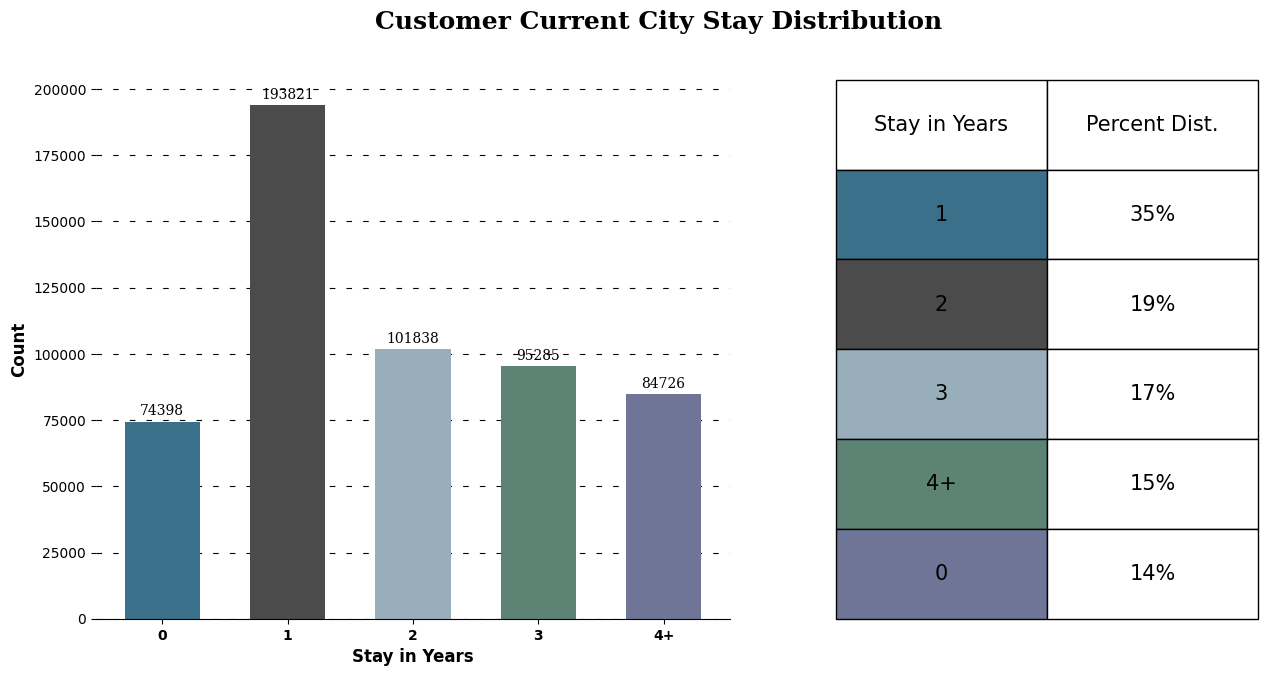

In [25]:
# Setting plot style and figure
fig = plt.figure(figsize=(15, 7))
gs = fig.add_gridspec(1, 2, width_ratios=[0.6, 0.4])

# Creating bar chart for 'Stay in Current City Years'
ax1 = fig.add_subplot(gs[0, 0])
stay_count = df['Stay_In_Current_City_Years'].value_counts().sort_index()
color_map = ["#3A7089", "#4b4b4c", "#99AEBB", "#5C8374", "#6F7597"]

# Bar plot with custom colors
ax1.bar(x=stay_count.index, height=stay_count.values, color=color_map, zorder=2, width=0.6)

# Adding value counts on top of the bars
for idx, value in zip(stay_count.index, stay_count.values):
    ax1.text(idx, value + 4000, f'{value}', ha='center', va='center', fontdict={'font': 'serif', 'size': 10})

# Adding grid lines and removing unnecessary axis spines
ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))
ax1.spines[['top', 'left', 'right']].set_visible(False)

# Setting axis labels
ax1.set_ylabel('Count', fontweight='bold', fontsize=12)
ax1.set_xlabel('Stay in Years', fontweight='bold', fontsize=12)
ax1.set_xticklabels(stay_count.index, fontweight='bold')

# Creating an info table for 'Stay in Current City Years'
ax2 = fig.add_subplot(gs[0, 1])
stay_info = [['1', '35%'], ['2', '19%'], ['3', '17%'], ['4+', '15%'], ['0', '14%']]
color_2d = [["#3A7089", '#FFFFFF'], ["#4b4b4c", '#FFFFFF'], ['#99AEBB', '#FFFFFF'], ['#5C8374', '#FFFFFF'], ['#6F7597', '#FFFFFF']]

# Creating and formatting the table
table = ax2.table(cellText=stay_info, cellColours=color_2d, cellLoc='center', colLabels=['Stay in Years', 'Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(15)

# Removing axis from the table plot
ax2.axis('off')

# Setting the title for the entire visual
fig.suptitle('Customer Current City Stay Distribution', font='serif', size=18, weight='bold')

# Displaying the plot
plt.show()


### 🔍 Insights

- **High Mobility Among Customers**: The data indicates that a significant portion of Walmart's customers are either new to the city or move frequently. These customers may have distinct preferences and needs compared to long-term residents


- **Newcomer Attraction**: Approximately 49% of customers have lived in their current city for one year or less, highlighting Walmart’s strong appeal to newcomers. This demographic may seek affordable and convenient shopping options as they establish themselves in a new environment.



- **Loyal Customer Base**: Customers who have resided in the same city for over four years account for 14% of the total. This suggests Walmart has cultivated a loyal segment of long-term residents who continue to shop at the store, despite being more settled.



- Opportunity for Targeting Long-Term Residents: The data reveals a declining percentage of customers as their tenure in the city increases. This suggests that Walmart could further enhance its relationship with long-term residents by introducing targeted loyalty programs and personalized promotions to encourage sustained engagement.



### 3.2.4 🛒 Top 10 Products and Categories: Sales Snapshot

- **`Top 10 Products and Product Categories`** which has sold most during Black Friday Sales

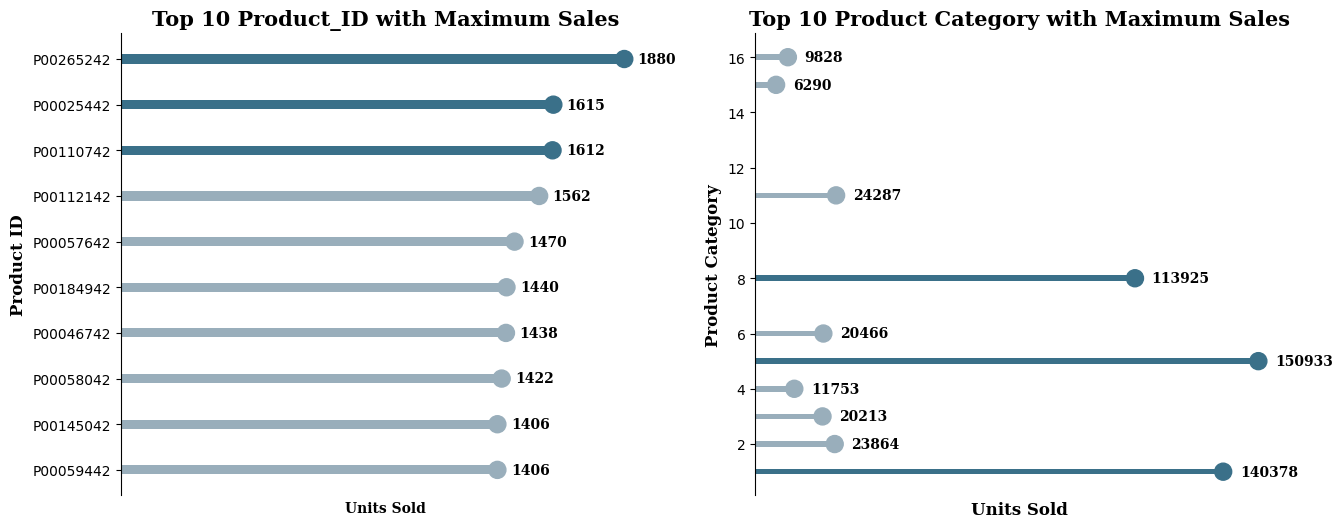

In [26]:
#setting the plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)

                                        #Top 10 Product_ID Sales

ax = fig.add_subplot(gs[0,0])

temp = df['Product_ID'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

color_map =  ['#99AEBB' for i in range(7)] + ["#3A7089" for i in range(3)]
#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 50 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
ax.set_ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title
ax.set_title('Top 10 Product_ID with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})


                                        #Top 10 Product Category Sales
ax = fig.add_subplot(gs[0,1])

temp = df['Product_Category'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 5000 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Product Category',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title
ax.set_title('Top 10 Product Category with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### 🔍 Insights

**1. Top 10 Products Sold** - The top-selling products during Walmart's Black Friday sales are characterized by a `relatively small variation` in sales numbers, suggesting that Walmart offers a variety of products that many different customers like to buy.


**2. Top 10 Product Categories** - Categories `5,1 and 8` have significantly outperformed other categories with combined Sales of nearly `75%` of the total sales suggesting a strong preference for these products among customers.

### 3.2.5 👷🏻‍♂️👷🏻‍♀️ Top 10 Customer Occupation

- **`Top 10 Occupation of Customer `** in Black Friday Sales

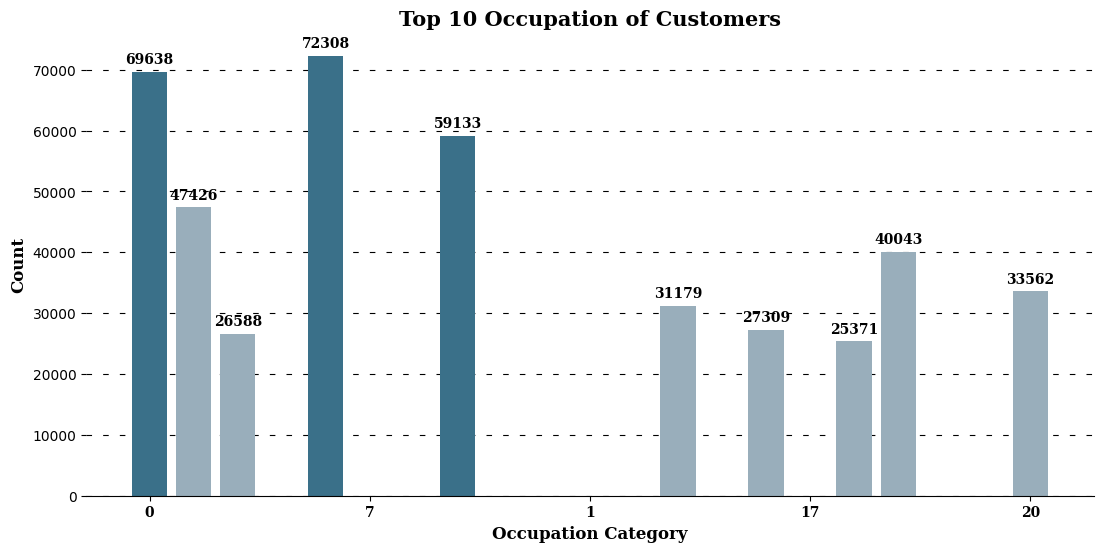

In [27]:
temp = df['Occupation'].value_counts()[0:10]

#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map =  ["#3A7089" for i in range(3)] +  ['#99AEBB' for i in range(7)]

#creating the plot
ax.bar(temp.index,temp.values,color = color_map,zorder = 2)

#adding valuecounts
for x,y in zip(temp.index,temp.values):
    ax.text(x, y + 2000, y,{'font':'serif', 'size':10,'weight':'bold'},va='center',ha = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the axis labels
ax.set_xticklabels(temp.index,fontweight = 'bold',fontfamily='serif')
ax.set_xlabel('Occupation Category',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Count',{'font':'serif', 'size':12,'weight':'bold'})

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Occupation of Customers',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

### 🔍 Insights

- Customers with Occupation category `4,0 and 7` contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have more disposable income to spend on Black Friday.

# 4.Bivariate Analysis

## 4.1 📊 Exploring Purchase Patterns

- Boxplots of Purchase Amount Across various Variables

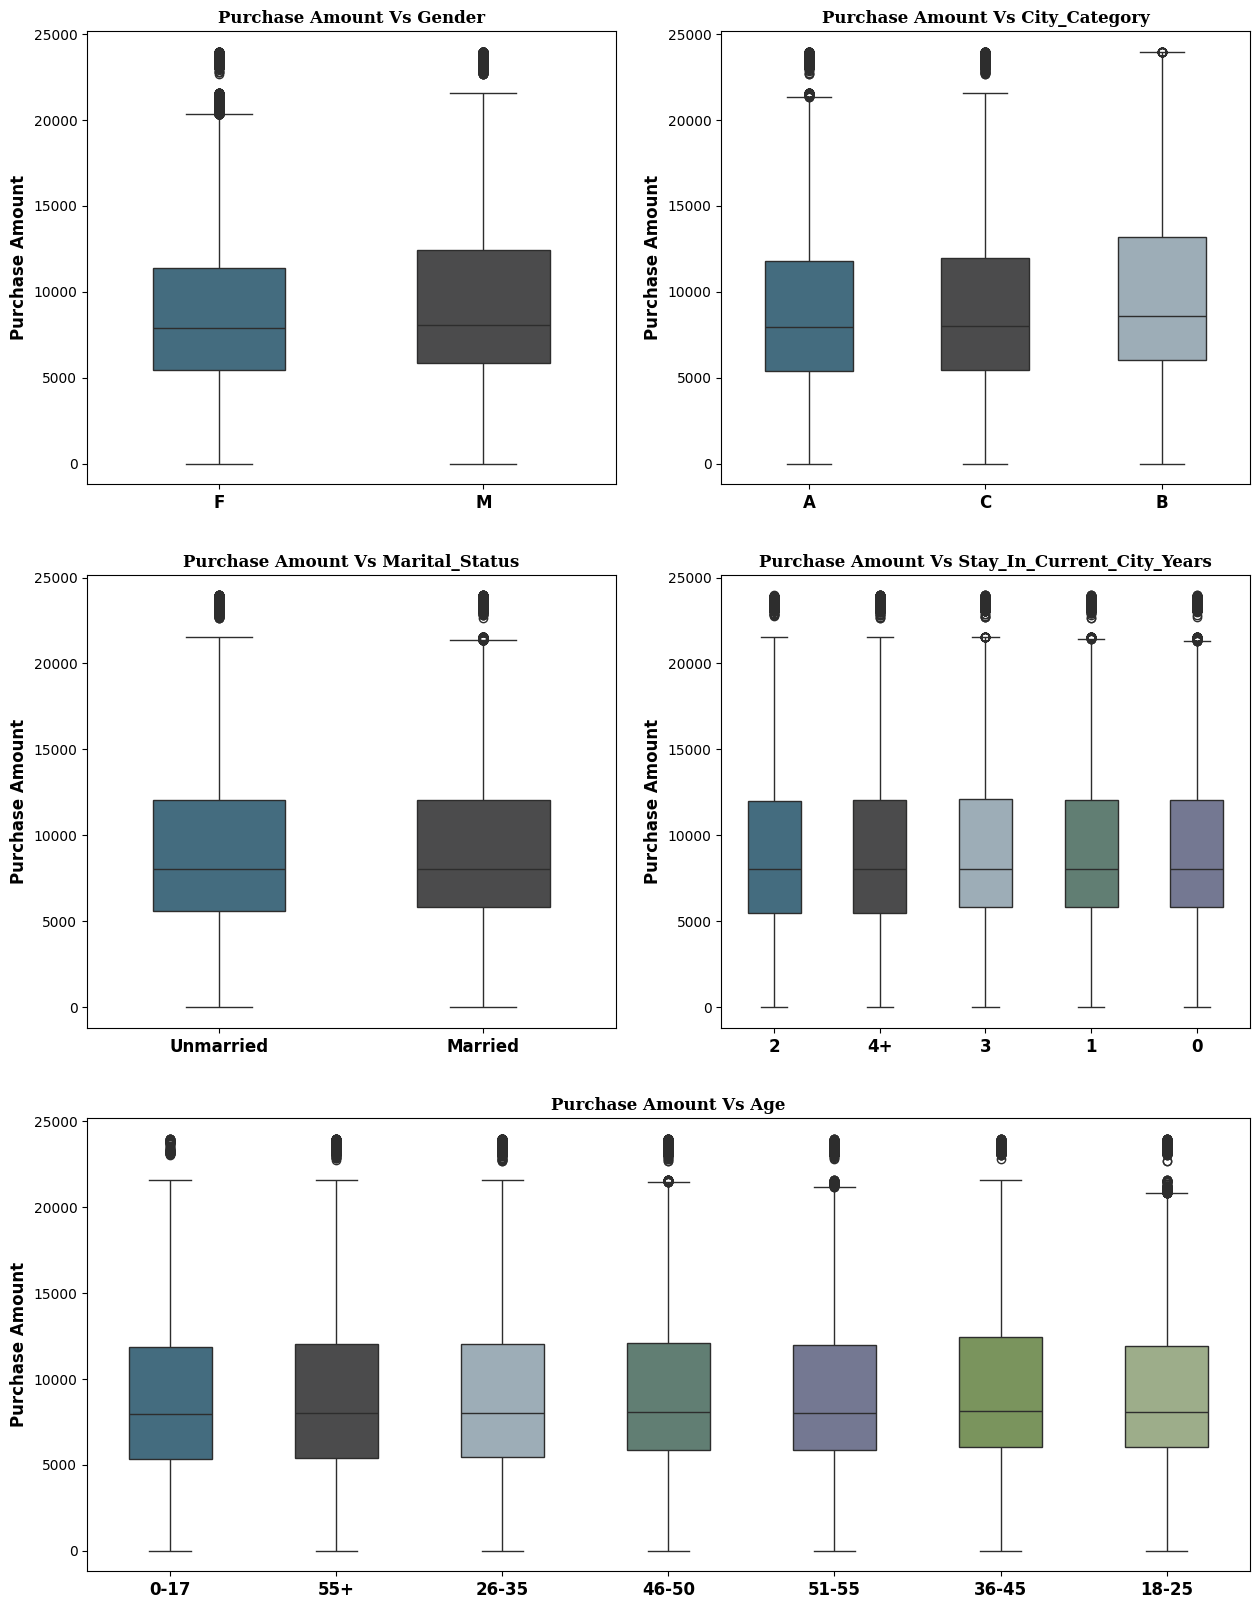

In [29]:
#setting the plot style
fig = plt.figure(figsize = (15,20))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:

    #plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])

    #plot
    color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
    sns.boxplot(data = df, x = k, y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)

    #plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df[k].unique(),fontweight = 'bold',fontsize = 12)
    ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')


plt.show()

### 🔍 Insights

- Out of all the variables analysed above, it's noteworthy that the purchase amount remains `relatively stable` regardless of the variable under consideration. As indicated in the data, the `median purchase amount` consistently hovers around `8,000 USD`, regardless of the specific variable being examined.

# 5. 🙎🏻‍♂️🙎🏻‍♀️ Gender VS 💰 Purchase Amount

## 5.1📊 Data Visualization

In [30]:
#creating a df for purchase amount vs gender
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


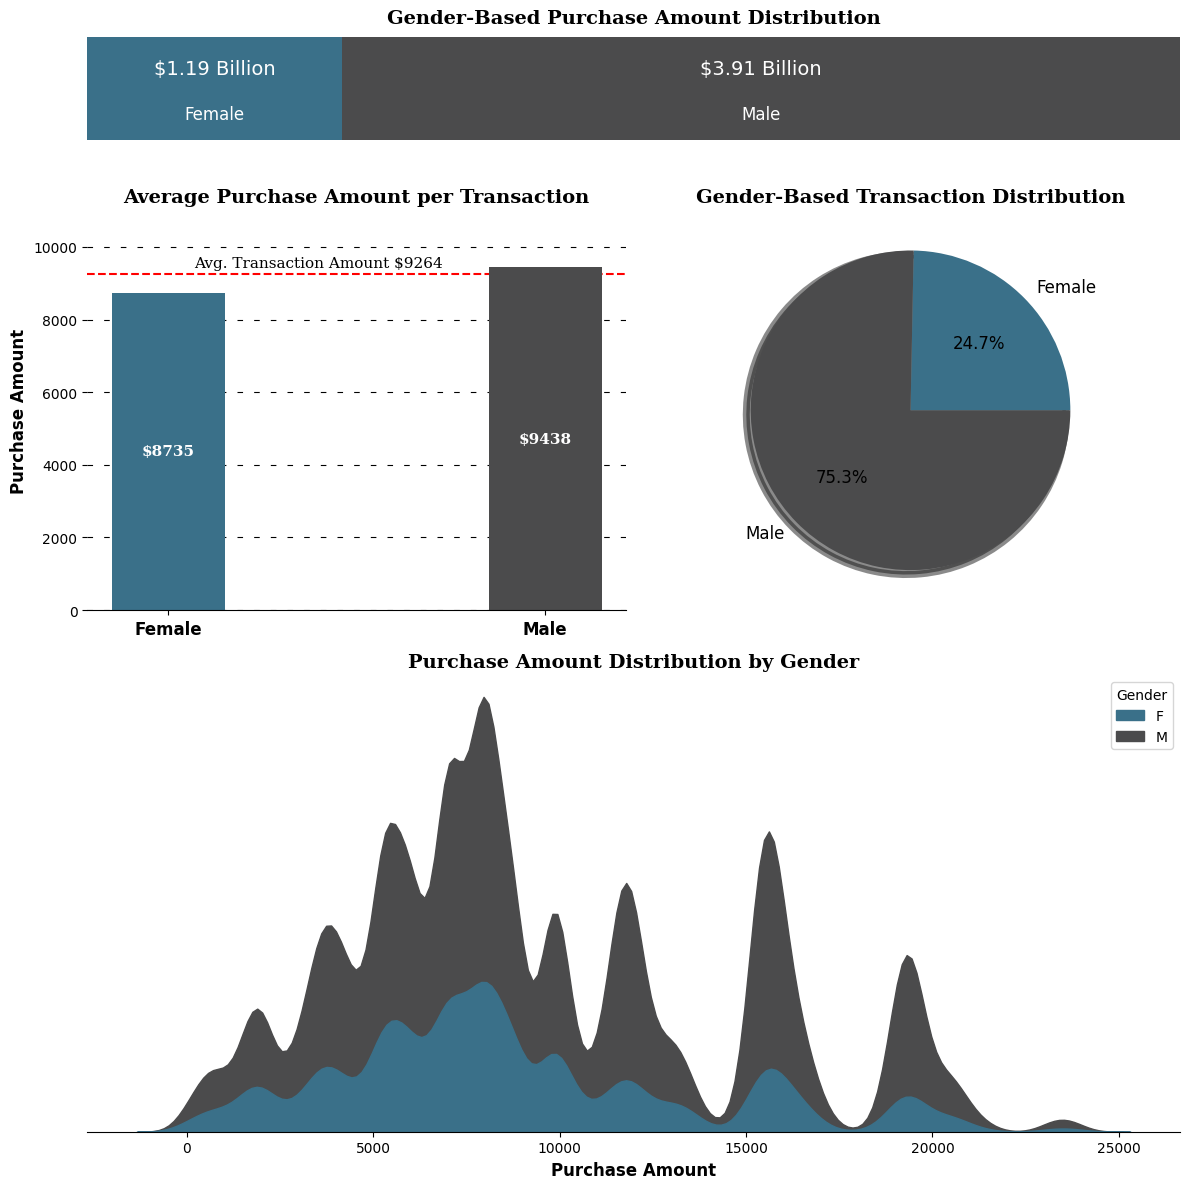

In [32]:
# Setting the plot style and adjusting figure size to reduce overall plot size
fig = plt.figure(figsize=(12, 12))  # Reduced from (15, 14) to (12, 12)
gs = fig.add_gridspec(3, 2, height_ratios=[0.1, 0.35, 0.4])  # Adjusted height ratios for better balance

# Distribution of Purchase Amount
ax = fig.add_subplot(gs[0, :])

# Plotting the visual
ax.barh(temp.loc[0, 'Gender'], width=temp.loc[0, '%sum'], color="#3A7089", label='Female')
ax.barh(temp.loc[0, 'Gender'], width=temp.loc[1, '%sum'], left=temp.loc[0, '%sum'], color="#4b4b4c", label='Male')

# Inserting text
txt = [0.0]  # For left parameter in ax.text()
for i in temp.index:
    # For amount
    ax.text(temp.loc[i, '%sum'] / 2 + txt[0], 0.15, f"${temp.loc[i, 'sum_in_billions']} Billion",
            va='center', ha='center', fontsize=14, color='white')  # Reduced font size for better fit

    # For gender
    ax.text(temp.loc[i, '%sum'] / 2 + txt[0], -0.20, f"{temp.loc[i, 'Gender']}",
            va='center', ha='center', fontsize=12, color='white')  # Reduced font size

    txt += temp.loc[i, '%sum']

# Removing axis lines and customizing ticks
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 1)

# Plot title
ax.set_title('Gender-Based Purchase Amount Distribution', fontdict={'font': 'serif', 'size': 14, 'weight': 'bold'})  # Slightly smaller title

# Distribution of Purchase Amount per Transaction
ax1 = fig.add_subplot(gs[1, 0])

# Plotting the visual
color_map = ["#3A7089", "#4b4b4c"]
ax1.bar(temp['Gender'], temp['per_purchase'], color=color_map, zorder=2, width=0.3)

# Adding average transaction line
avg = round(df['Purchase'].mean())
ax1.axhline(y=avg, color='red', zorder=0, linestyle='--')

# Adding text for the line
ax1.text(0.4, avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         fontdict={'font': 'serif', 'size': 11}, ha='center', va='center')  # Reduced font size for average line text

# Adjusting y limits
ax1.set_ylim(0, 11000)

# Adding value counts
for i in temp.index:
    ax1.text(temp.loc[i, 'Gender'], temp.loc[i, 'per_purchase'] / 2, f"${temp.loc[i, 'per_purchase']:.0f}",
             fontdict={'font': 'serif', 'size': 11, 'color': 'white', 'weight': 'bold'}, ha='center', va='center')  # Adjusted font size

# Adding grid lines
ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Removing axis lines and customizing axis labels
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)

ax1.set_ylabel('Purchase Amount', fontweight='bold', fontsize=12)
ax1.set_xticklabels(temp['Gender'], fontweight='bold', fontsize=12)

# Plot title
ax1.set_title('Average Purchase Amount per Transaction', fontdict={'font': 'serif', 'size': 14, 'weight': 'bold'})

# Pie chart for gender distribution
ax2 = fig.add_subplot(gs[1, 1])

# Plotting the pie chart
ax2.pie(temp['count'], labels=temp['Gender'], autopct='%.1f%%',
        shadow=True, colors=color_map, wedgeprops={'linewidth': 5},
        textprops={'fontsize': 12, 'color': 'black'})  # Reduced text size in the pie chart

# Plot title
ax2.set_title('Gender-Based Transaction Distribution', fontdict={'font': 'serif', 'size': 14, 'weight': 'bold'})

# KDE plot for purchase amount distribution
ax3 = fig.add_subplot(gs[2, :])

# Plotting the KDE plot
sns.kdeplot(data=df, x='Purchase', hue='Gender', palette=color_map, fill=True, alpha=1, ax=ax3)

# Removing axis lines and adjusting labels
for s in ['top', 'left', 'right']:
    ax3.spines[s].set_visible(False)

ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)

# Plot title
ax3.set_title('Purchase Amount Distribution by Gender', fontdict={'font': 'serif', 'size': 14, 'weight': 'bold'})

# Display the plot
plt.tight_layout()
plt.show()


### 🔍 Insights

1. ** Total Sales and Transaction Volume**: Male customers contributed significantly more to Black Friday sales, with their total purchase amount and number of transactions exceeding those of female customers by over threefold. This highlights the stronger purchasing power and impact of male customers during this event.


2. **Average Purchase Value per Transaction**: On average, male customers spent more per transaction compared to female customers, with the average transaction value being $ 9,438 for males vs $8,735 for females. This suggests a marginal but notable difference in spending behavior between genders.

3. **Purchase Amount Distribution**: The distribution of purchase amounts for both male and female customers is not normally distributed, indicating potential skewness or the presence of outliers in the data. This insight may warrant further analysis to better understand the underlying purchasing patterns.

## 5.2 Confidence Interval Construction: Estimating Average Purchase Amount per Transaction

**1. Step 1 - Building CLT Curve**
- As seen above, the purchase amount distribution is not Normal. So we need to use `Central Limit Theorem`. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

**2. Step 2 - Building Confidence Interval**
- After building CLT curve, we will create a confidence interval predicting population mean at `99%,95% and 90% Confidence level`.
    
**Note** -  We will use different sample sizes of [100,1000,5000,50000]

In [33]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [34]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples,female_samples

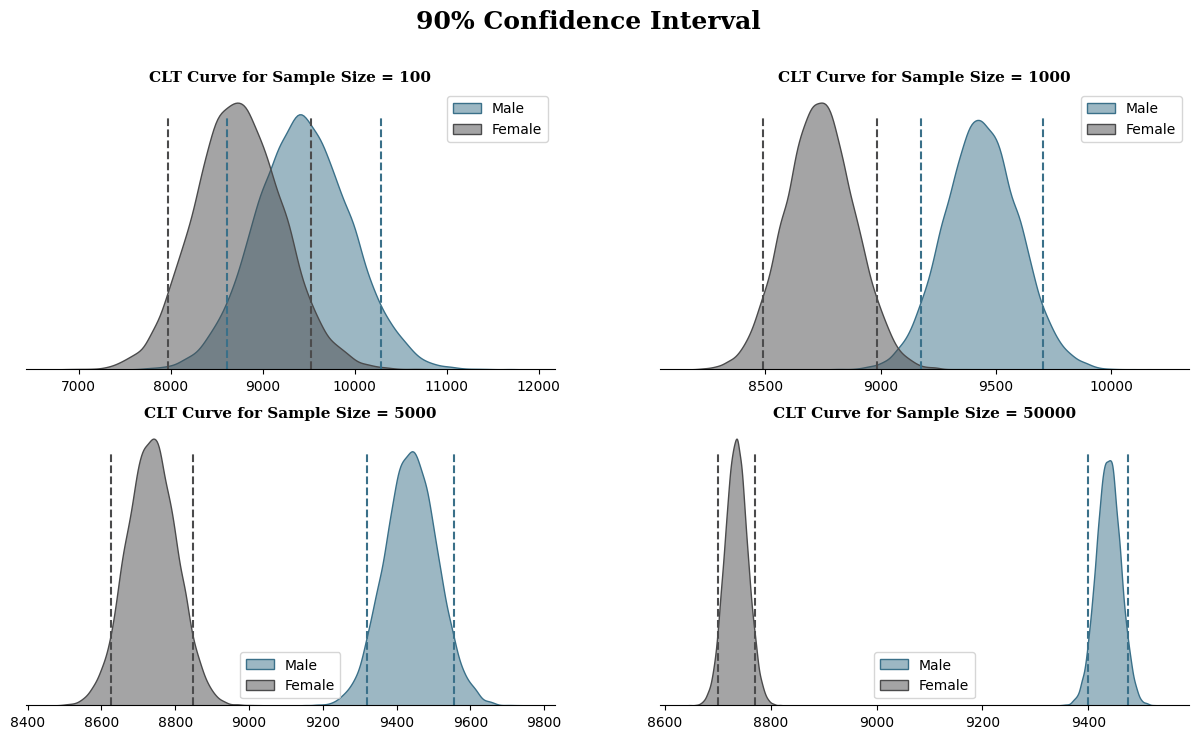

In [35]:
m_samp_90,f_samp_90 = plot(90)

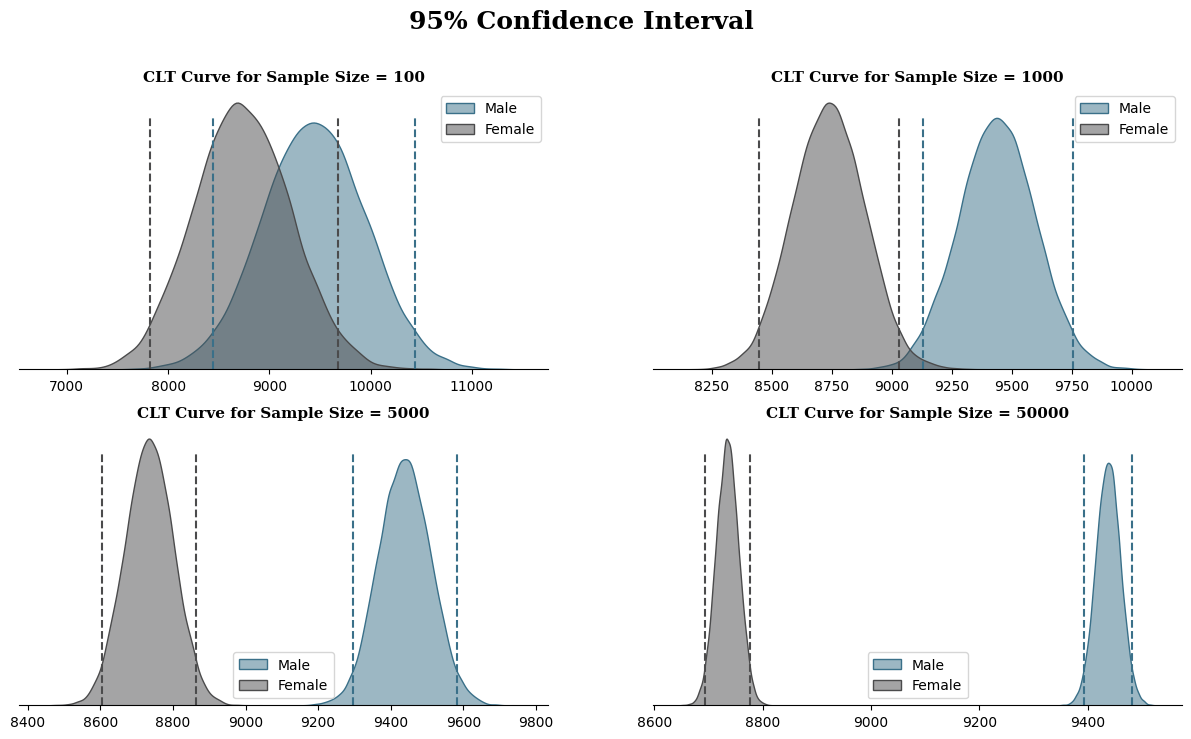

In [36]:
m_samp_95,f_samp_95 = plot(95)

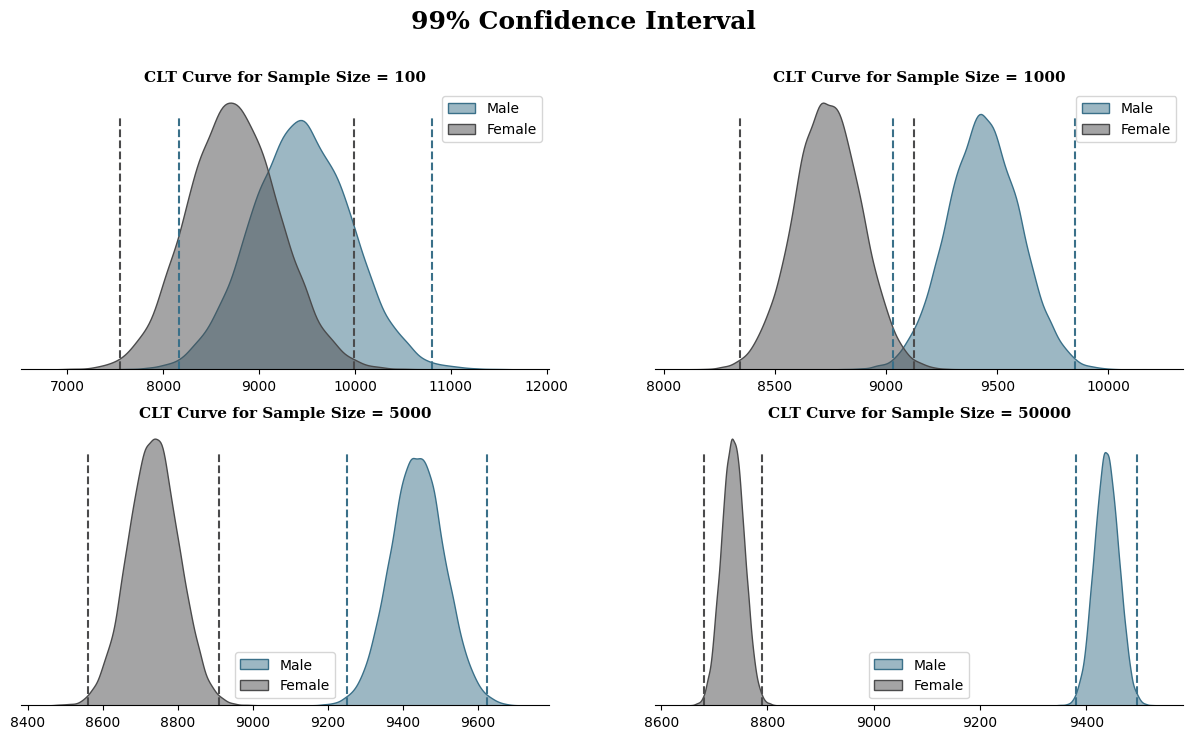

In [37]:
m_samp_99,f_samp_99 = plot(99)

### Are confidence intervals of average male and female spending overlapping?

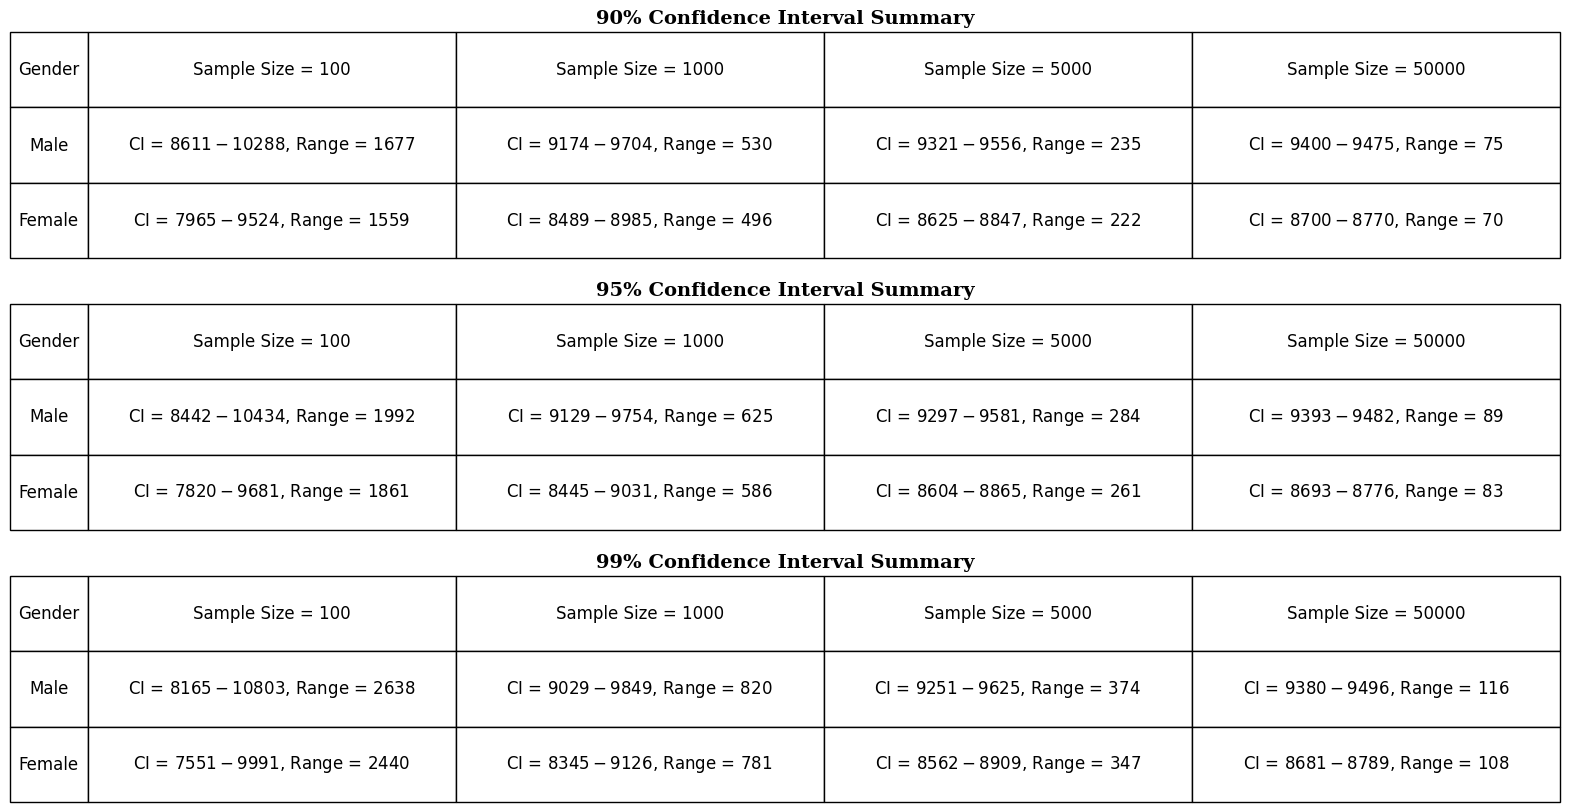

In [38]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(m_samp_90,f_samp_90,90,0),(m_samp_95,f_samp_95,95,1),(m_samp_99,f_samp_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Male']
    f_ci = ['Female']

    #finding ci for each sample size (males)
    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    #finding ci for each sample size (females)
    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

                                        #plotting the summary
    ax = fig.add_subplot(gs[l])

    #contents of the table
    ci_info = [m_ci,f_ci]

    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis
    ax.axis('off')

    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})


# Insights



*   **Importance of Sample Size** : The analysis underscores the critical role of sample size in estimating population parameters. As the sample size increases, confidence intervals become narrower, leading to more precise estimates. For businesses, this means larger samples provide more reliable insights and enhance decision-making processes.
*   **Confidence Intervals and Statistical Significance** :  Except for the sample size of 100, the confidence intervals for male and female average spending do not overlap as the sample size increases. This indicates a statistically significant difference between the average spending per transaction for men and women within the given samples.



*   **Estimated Population Averages** : At a 95% confidence level, we estimate that the true population average spending per transaction for males falls between $9,393 and $9,483, and for females, between $8,692 and $8,777
*  **Gender Differences in Spending** : Men tend to spend more per transaction on average than women, as evidenced by the consistently higher upper bounds of the confidence intervals for male customers across different sample sizes.


*  **Strategic Implications for Walmart** :

**1. Market Segmentation Opportunities** : Walmart can leverage these insights by developing targeted marketing campaigns, loyalty programs, or product bundles that cater to the distinct spending behaviors of male and female customers. Tailoring offerings to specific customer segments may help maximize revenue and enhance customer satisfaction.

2. Pricing and Promotion Strategies : Based on the observed differences in average spending per transaction by gender, Walmart might consider adjusting pricing or discount strategies. For example, they could implement promotions that incentivize higher spending among male customers while ensuring competitive pricing for products that appeal more to female customers.

**Note: For the remainder of our analysis, we will use a 95% confidence level.**








# 6. 👩🏻‍🤝‍🧑🏻Marital Status VS 💰 Purchase Amount

## 6.1📊 Data Visualization

In [39]:
#creating a df for purchase amount vs marital status
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Unmarried,3008927447,324731,3.01,0.59,9266.0
1,Married,2086885295,225337,2.09,0.41,9261.0


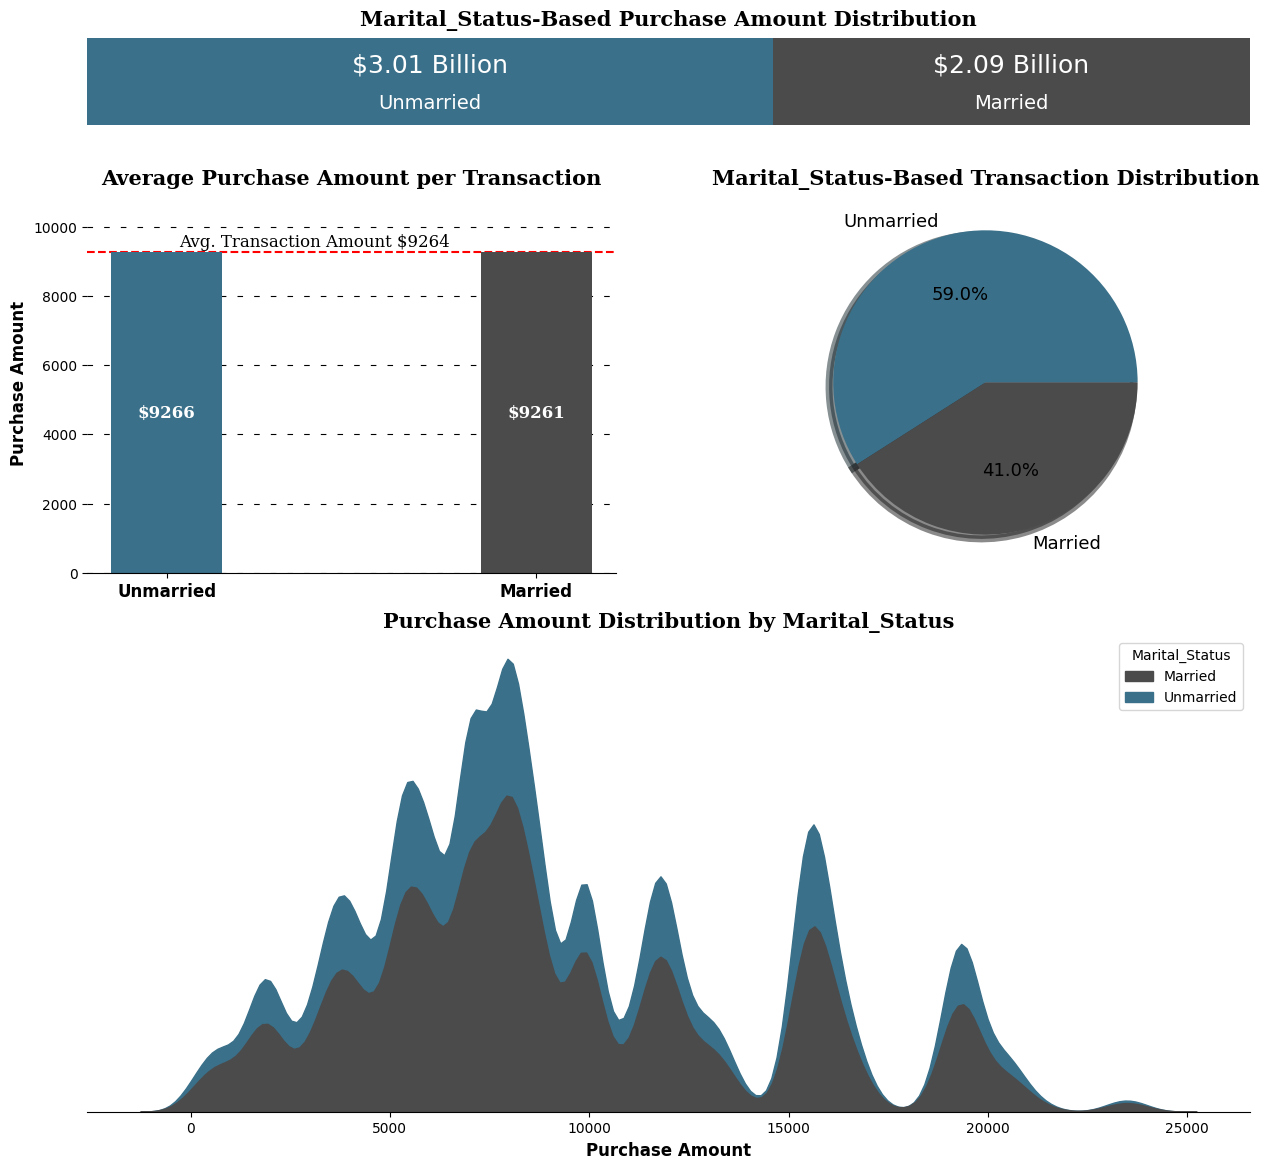

In [40]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Unmarried')
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Married')

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')

    #for marital status
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Marital_Status']}",
           va = 'center', ha='center',fontsize=14, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Marital_Status-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Marital_Status'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Marital_Status'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Marital_Status'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for Marital_Status disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Marital_Status'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Marital_Status-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])
color_map = [ "#4b4b4c","#3A7089"]

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Marital_Status', palette = color_map,fill = True, alpha = 1,
            ax = ax3,hue_order = ['Married','Unmarried'])

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Marital_Status',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()


### 🔍 Insights

**1. Total Sales and Transactions Comparison**
- The total purchase amount and number of transactions by Unmarried customers was `more` than `20%` the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.

**2. Average Transaction Value**
- The average purchase amount per transaction was almost similar for married and unmarried customers `($9261 vs $9266)`.

**3. Distribution of Purchase Amount**
- As seen above, the purchase amount for both married and unmarried customers is `not normally distributed`.

## 6.2 Confidence Interval Construction: Estimating Average Purchase Amount per Transaction

**1. Step 1 - Building CLT Curve**
- As seen above, the purchase amount distribution is not Normal. So we need to use `Central Limit Theorem`. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

**2. Step 2 - Building Confidence Interval**
- After building CLT curve, we will create a confidence interval predicting population mean at `95% Confidence level`.
    
**Note** -  We will use different sample sizes of [100,1000,5000,50000]

In [41]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames
    df_married = df.loc[df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}

    for i,x,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return married_samples,unmarried_samples

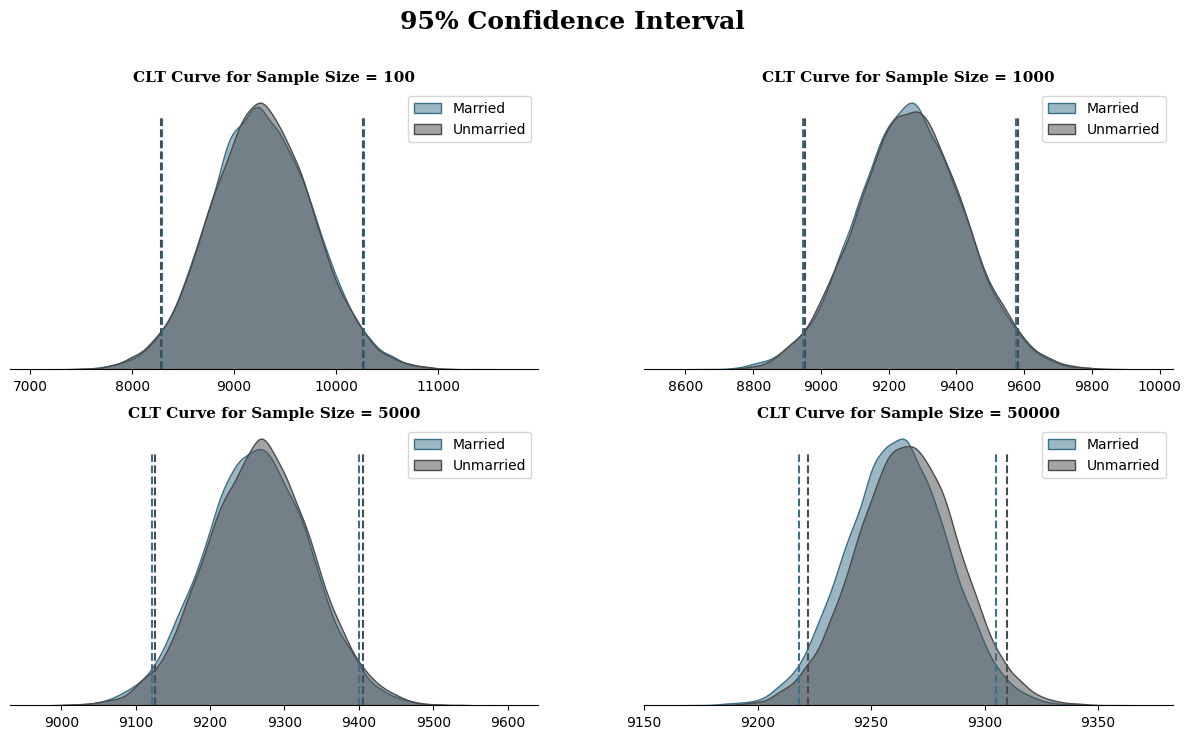

In [42]:
m_samp_95,u_samp_95 = plot(95)

### Are confidence intervals of average married and unmarried customer spending overlapping?

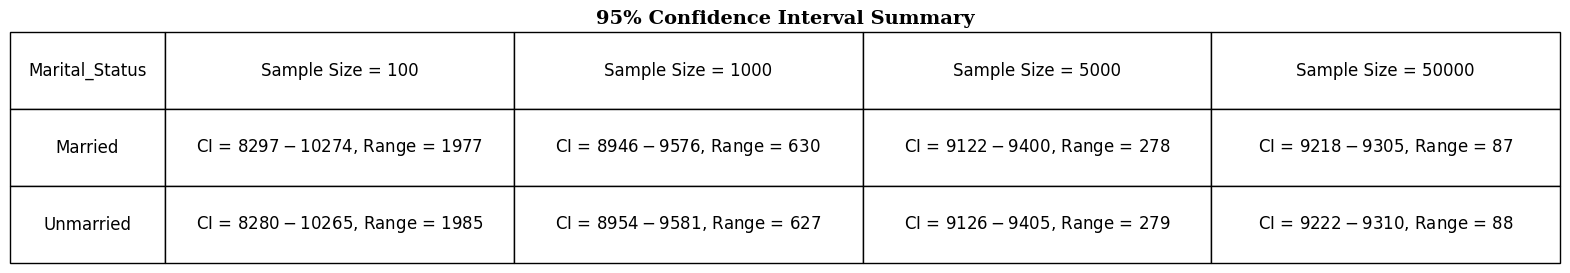

In [43]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,3))

#list for collecting ci for given cl
m_ci = ['Married']
u_ci = ['Unmarried']

#finding ci for each sample size (married)
for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
for u in u_samp_95:
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

                                    #plotting the summary
#contents of the table
ci_info = [m_ci,u_ci]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Marital_Status','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

### 🔍 Insights

1. **Importance of Sample Size** :

The analysis underscores the significance of sample size in estimating population parameters. Specifically, it demonstrates that as the sample size increases, confidence intervals become narrower and more precise. In a business context, this means larger sample sizes can yield more reliable insights and estimates.

2. **Confidence Intervals and Statistical Significance** :

The observed overlap in confidence intervals across all sample sizes indicates no statistically significant difference between the average spending per transaction of married and unmarried customers within the samples analyzed.


3.  **Estimated Population Averages :**

With 95% confidence, the true population average spending per transaction for married customers is estimated to fall between $9,217 and $9,305, and for unmarried customers, between $ 9,222 and $ 9,311

4. **Similar Spending Behaviors** :

The overlapping confidence intervals suggest that both married and unmarried customers exhibit similar spending behaviors per transaction. This implies that marital status does not significantly impact the average transaction amount.

5. **Strategic Recommendations for Walmart**


Unified Marketing Approach: Since spending is similar between married and unmarried customers, Walmart should adopt a unified marketing strategy targeting both groups equally.

Optimize Marketing Resources: Reallocate resources from marital status segmentation to initiatives like enhancing online platforms or improving in-store experiences.

Personalized Customer Engagement: Utilize data analytics to offer personalized shopping experiences based on individual preferences, not marital status.
Broad Product Assortment: Ensure product offerings appeal to a wide audience, maximizing market reach and customer retention.

Focus on Other Demographics: Explore other factors like age, income, or shopping behavior for potential targeted marketing opportunities.

# 7. 📆 Customer Age VS 💰 Purchase Amount

## 7.1📊 Data Visualization

In [44]:
#creating a df for purchase amount vs age group
temp = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


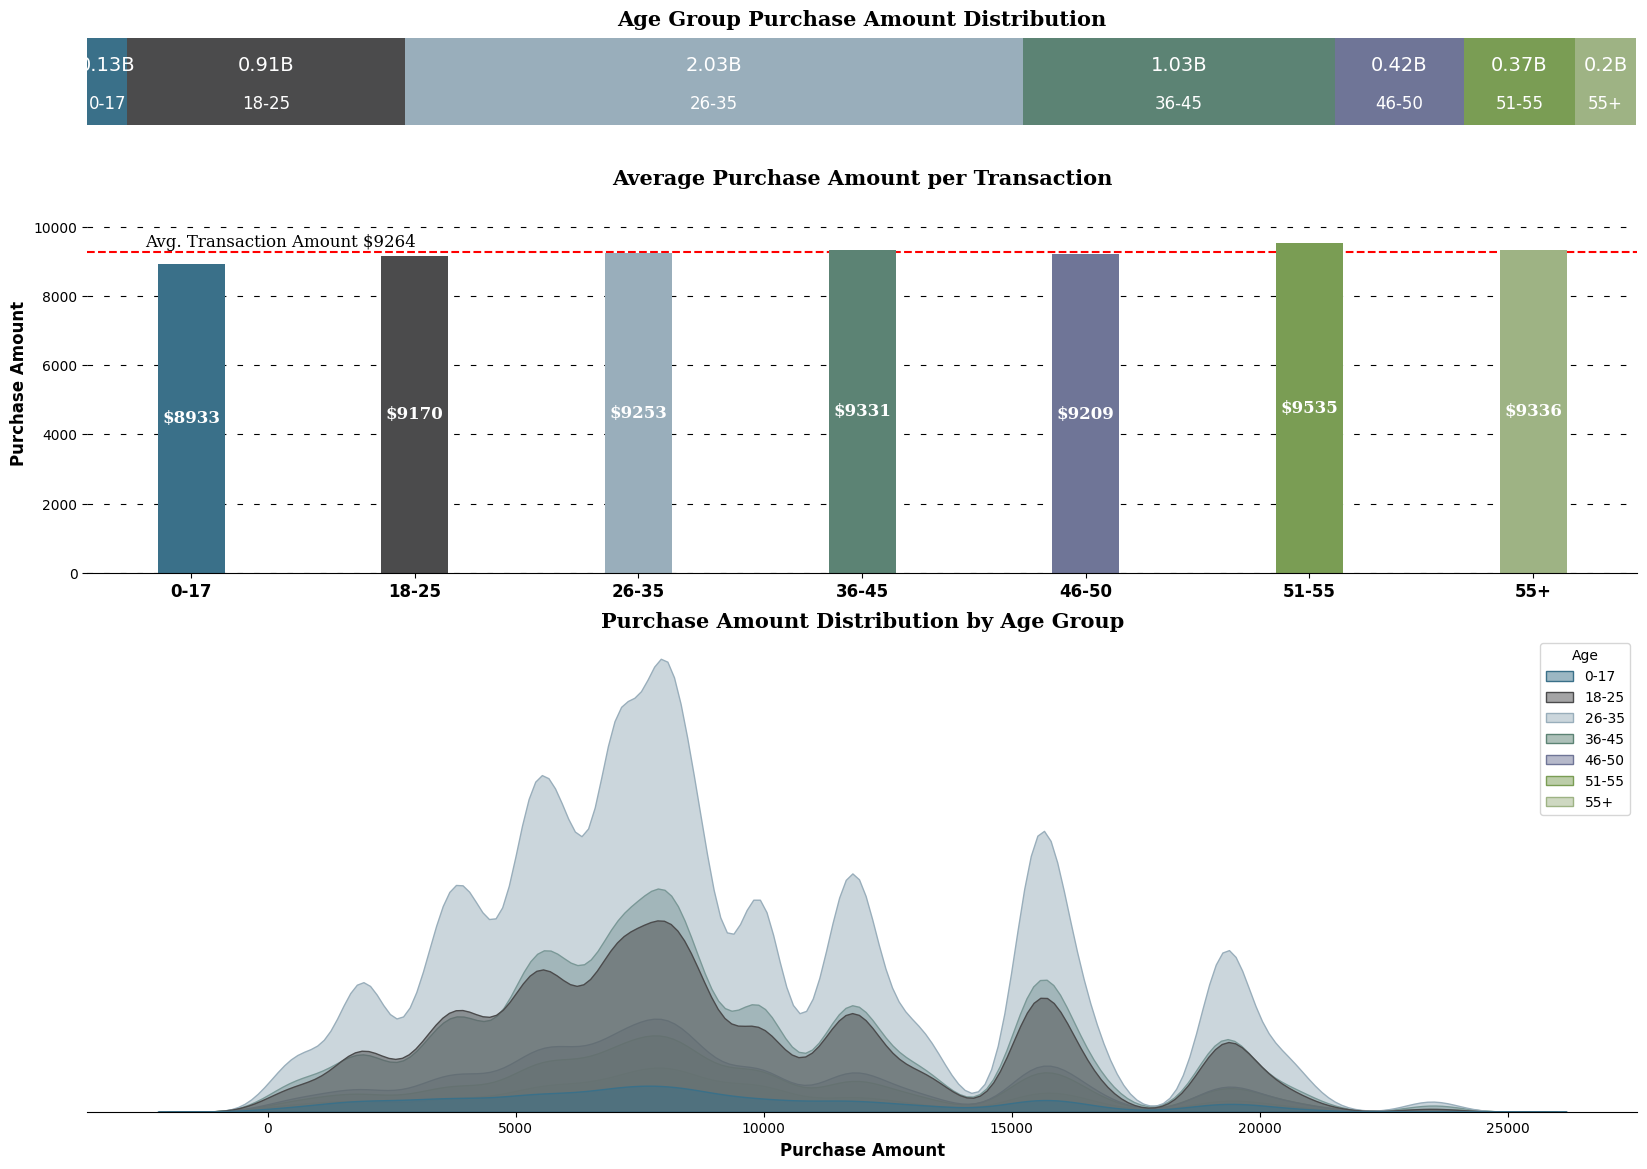

In [45]:
#setting the plot style
fig = plt.figure(figsize = (20,14))
gs = fig.add_gridspec(3,1,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0])
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

#plotting the visual
left = 0

for i in temp.index:
    ax.barh(temp.loc[0,'Age'],width = temp.loc[i,'%sum'],left = left,color = color_map[i],label = temp.loc[i,'Age'])
    left += temp.loc[i,'%sum']

#inserting the text
txt = 0.0 #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt,0.15,f"{temp.loc[i,'sum_in_billions']}B",
           va = 'center', ha='center',fontsize=14, color='white')

    #for age grp
    ax.text(temp.loc[i,'%sum']/2 + txt,- 0.20 ,f"{temp.loc[i,'Age']}",
           va = 'center', ha='center',fontsize=12, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Age Group Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1])


#plotting the visual
ax1.bar(temp['Age'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Age'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Age'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})


                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age', palette = color_map,fill = True, alpha = 0.5,
            ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Age Group',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()


### 🔍 Insights

**1. Total Sales Comparison**
- Age group between `26 - 45` accounts to almost `60%` of the total sales suggesting that Walmart's Black Friday sales are most popular among these age groups.

- The age group `0-17` has the lowest sales percentage `(2.6%)`, which is expected as they may not have as much purchasing power. Understanding their preferences and providing special offers could be beneficial, especially considering the potential for building customer loyalty as they age.

**2. Average Transaction Value**
-  While there is not a significant difference in per purchase spending among the age groups, the `51-55` age group has a relatively low sales percentage `(7.2%)`but they have the highest per purchase spending at `9535`. Walmart could consider strategies to attract and retain this high-spending demographic.

**3. Distribution of Purchase Amount**
- As seen above, the purchase amount for all age groups is `not normally distributed`.

## 7.2 Confidence Interval Construction: Estimating Average Purchase Amount per Transaction

**1. Step 1 - Building CLT Curve**
- As seen above, the purchase amount distribution is not Normal. So we need to use `Central Limit Theorem`. It states the distribution of sample means will approximate a normal distribution, regardless of the underlying population distribution

**2. Step 2 - Building Confidence Interval**
- After building CLT curve, we will create a confidence interval predicting population mean at `95% Confidence level`.
    
**Note** -  We will use different sample sizes of [100,1000,5000,50000]

In [48]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    #creating separate data frames

    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] == '18-25','Purchase']
    df_3 = df.loc[df['Age'] == '26-35','Purchase']
    df_4 = df.loc[df['Age'] == '36-45','Purchase']
    df_5 = df.loc[df['Age'] == '46-50','Purchase']
    df_6 = df.loc[df['Age'] == '51-55','Purchase']
    df_7 = df.loc[df['Age'] == '55+','Purchase']


    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0),(1000,1),(5000,2),(50000,3)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7


        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x])

        #plots
        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:

            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

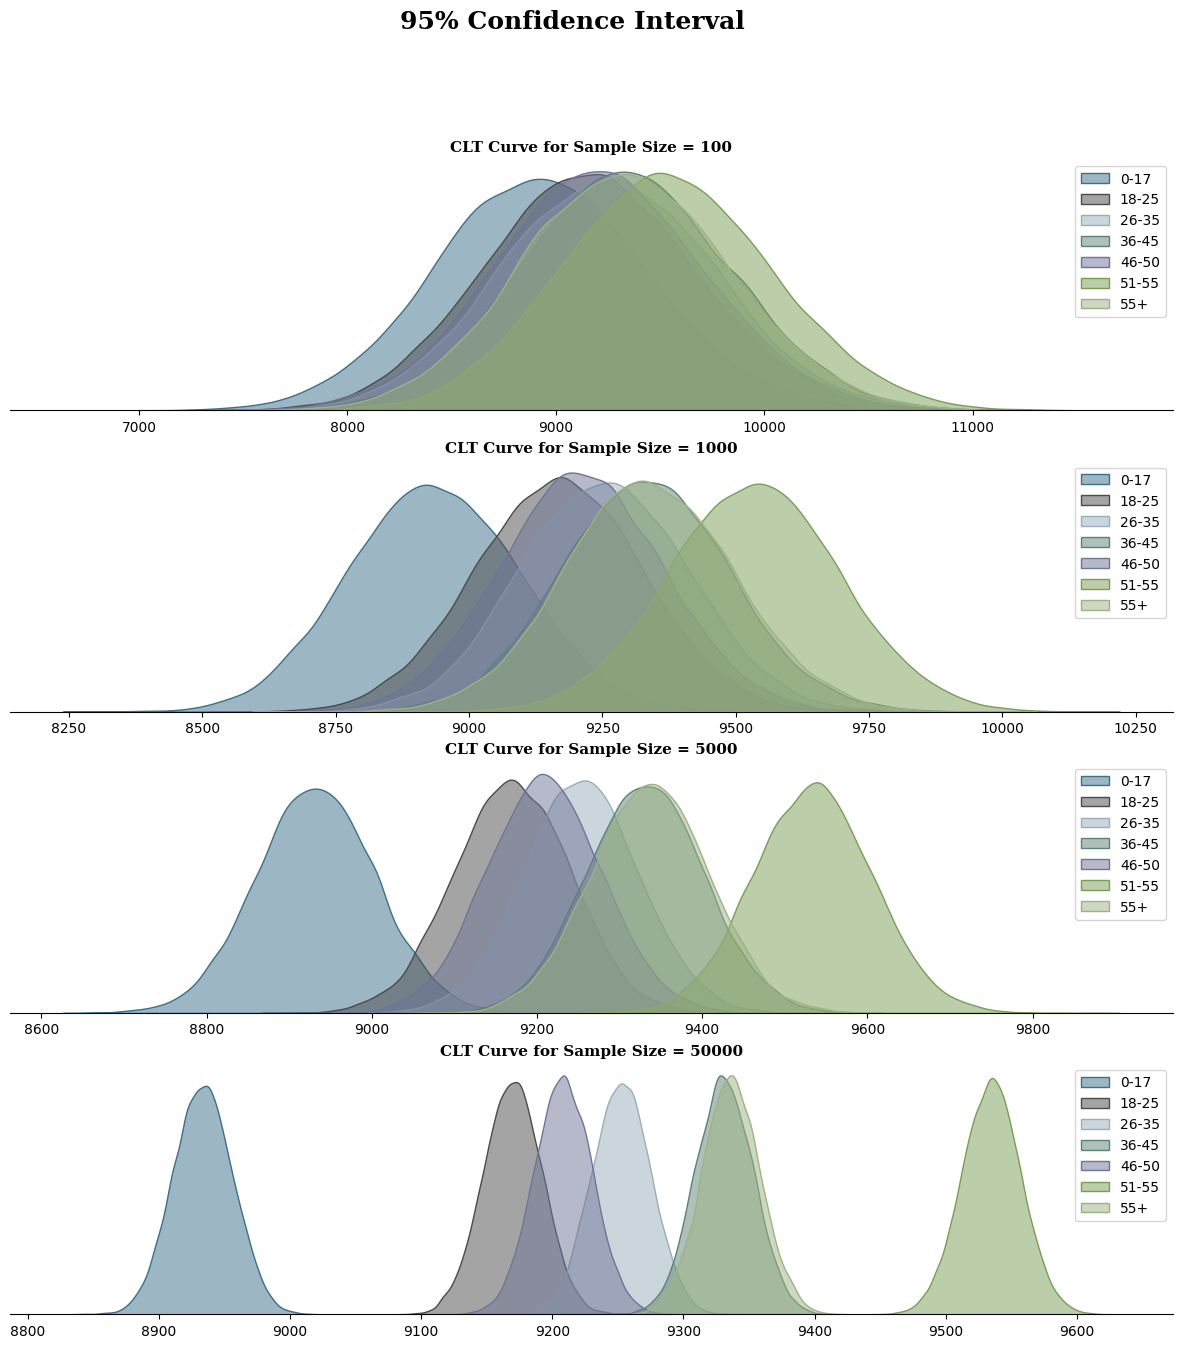

In [49]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

### Are confidence intervals of customer's age-group spending overlapping?

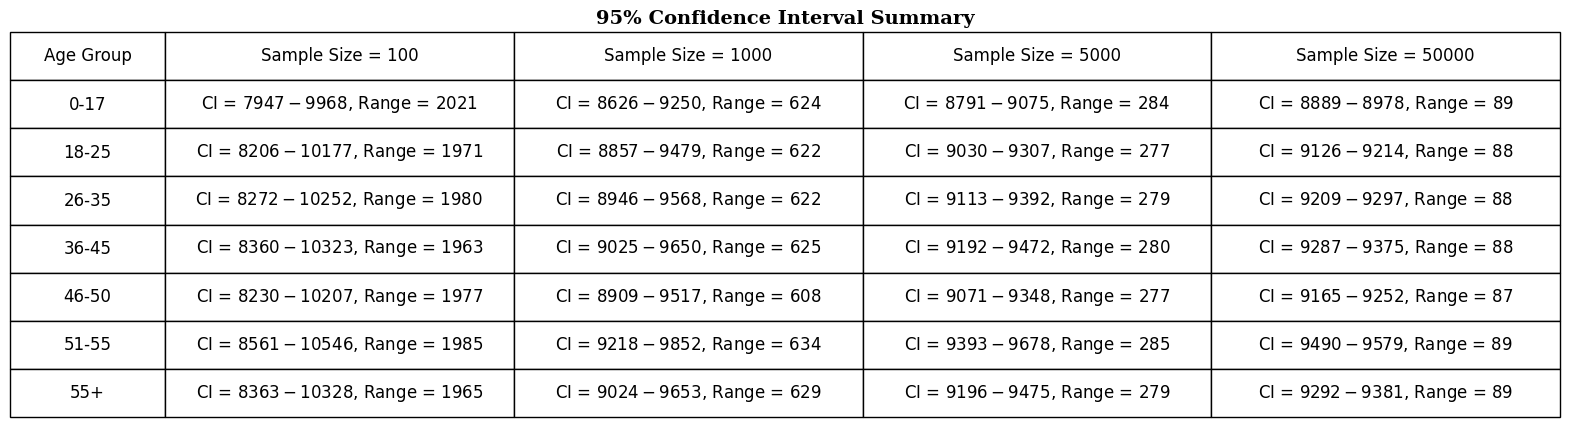

In [51]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,5))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

### 🔍 Insights

1. **Importance of Sample Size**

The analysis highlights the crucial role of sample size in estimating population parameters. As the sample size increases, confidence intervals become narrower and estimates more precise. This underscores the importance of utilizing larger sample sizes to obtain reliable insights for informed business decisions.

2. **Confidence Intervals and Customer Spending Patterns**

The overlapping confidence intervals among certain age groups indicate similar spending behaviors:

Age 0-17: This group has the lowest spending per transaction.
Ages 18-25, 26-35, 46-50: These groups exhibit overlapping confidence intervals, suggesting similar buying characteristics.
Ages 36-45, 55+: These age groups also have overlapping confidence intervals, indicating comparable spending patterns.
Age 51-55: This group has the highest spending per transaction.


3. **Population Average**
- We are 95% confident that the true population average spending per transaction for each age group falls within the following ranges:-

    - 0 - 17 = \$ 8,888 to 8,979
    - 18 - 25 = \$ 9,125 to 9,213
    - 26 - 35 = \$ 9,209 to 9,297
    - 36 - 45 = \$ 9,288 to 9,376
    - 46 - 50 = \$ 9,165 to 9,253
    - 51 - 55 = \$ 9,490 to 9,579
    - 55+ = \$ 9,292 to 9,381


4. **Strategic Recommendations for Walmart**



*  Targeted Marketing Initiatives

Age 0-17: Given the lower spending in this group, Walmart should consider strategies to boost their transaction values. This could include offering youth-focused promotions, discounts, or loyalty programs. Tailoring product selections to align with their interests can also encourage increased spending.
*  Optimized Customer Segmentation

Ages 18-25, 26-35, 46-50: With similar buying behaviors, these groups can be targeted with unified marketing campaigns. Developing product offerings and promotions that appeal to their shared preferences can enhance marketing efficiency and effectiveness.

Ages 36-45, 55+: These age groups exhibit comparable spending patterns. Walmart can optimize its product selection and pricing strategies to meet the needs of these customers, potentially increasing satisfaction and loyalty.


*  Enhanced Services for High-Spending Demographics

Age 51-55: Recognizing this group’s higher spending per transaction, Walmart can explore opportunities to further engage these customers. Offering premium services, personalized shopping experiences, exclusive promotions, or dedicated loyalty programs can strengthen their connection to the brand.

*  Data-Driven Personalization

Leverage data analytics to personalize marketing efforts across all age groups. By understanding individual customer preferences and behaviors, Walmart can deliver more relevant product recommendations and promotions, enhancing customer engagement and driving sales.



*  Strategic Resource Allocation

By identifying age groups with overlapping spending characteristics, Walmart can allocate marketing resources more efficiently. Focusing on group-specific strategies where appropriate ensures that efforts are targeted and impactful, maximizing return on investment.







# 8. Recommendations

1.**Target Male Shoppers** :

Leverage High-Spending Demographics: With male customers accounting for a significant portion of Black Friday sales and exhibiting higher average transaction values, Walmart should tailor marketing strategies to further engage this segment. This can include promoting products that resonate with male shoppers, offering bundled deals on electronics or tools, and utilizing targeted advertising channels. Simultaneously, maintaining competitive pricing and attractive promotions for female-oriented products will ensure a balanced appeal across

2. **Focus on the 26–45 Age Group** :

Cater to the Core Purchasing Demographic: The 26 to 45 age group contributes to the majority of sales during Black Friday. Walmart should prioritize understanding the preferences and needs of this demographic by offering exclusive deals on popular products, enhancing online shopping experiences, and utilizing personalized marketing campaigns. Incorporating trends and products that are particularly appealing to this age group can drive higher engagement and sales.

3. **Engage Younger Shoppers** :

Build Early Brand Loyalty: Recognizing that customers aged 0–17 have the lowest spending per transaction, Walmart can implement strategies to increase engagement and spending within this group. Offering attractive discounts, loyalty programs, or gamified shopping experiences can incentivize purchases. Creating marketing campaigns that resonate with younger audiences through social media and influencer partnerships can also foster long-term brand loyalty.

4. **Optimize Customer Segmentation** :

Tailor Offerings Based on Purchasing Behaviors: Customers in the 18–25, 26–35, and 46–50 age groups display similar buying characteristics, as do those in the 36–45 and 55+ brackets. Walmart can optimize product selections and marketing messages to cater to these segments more effectively. Adjusting pricing strategies, promotions, and inventory based on the specific preferences of these groups can enhance customer satisfaction and drive sales growth.

5.  **Enhance the Shopping Experience for Ages 51–55**

Capitalize on High-Spending Customers: Customers aged 51–55 have the highest spending per transaction. Walmart should consider offering exclusive perks to this demographic, such as early access to Black Friday deals, personalized discounts, or tailored product recommendations. Implementing loyalty programs specifically designed for this age group can encourage repeat purchases and strengthen customer retention.

6. **Post-Black Friday Engagement** :
- **Foster Ongoing Customer Relationships**: To maximize the long-term value of Black Friday customers, Walmart should engage in post-purchase communication. Sending follow-up emails with personalized product suggestions, exclusive offers, or invitations to special events can enhance customer retention. Providing exceptional customer service and soliciting feedback can also encourage repeat business throughout the holiday season and beyond.

# Conclusion

By adopting these strategic recommendations, Walmart can significantly enhance its Black Friday performance and overall market position. Focusing on high-value customer segments such as male shoppers and the 26–45 age group allows for targeted marketing efforts that drive sales and increase market share. Engaging younger shoppers and building early brand loyalty ensures a steady customer base for the future. Optimizing customer segmentation and tailoring offerings to specific purchasing behaviors enhance customer satisfaction and operational efficiency. Enhancing the shopping experience for high-spending demographics and maintaining post-Black Friday engagement fosters long-term customer relationships and loyalty. Collectively, these initiatives position Walmart to achieve sustained growth, outperform competitors, and solidify its leadership in the retail industry.
**bold text**






